# Data Description:  
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

# Domain:  
Object recognition 

# Context: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# import Standard scaler to scale the numeric fields as mentioned above in the description
from sklearn.preprocessing import StandardScaler
# to impute the missing values
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#set the basic figure size and pallete
plt.figure(figsize=(10,15))
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

<Figure size 720x1080 with 0 Axes>

In [3]:
#Load data set
dfVehicle = pd.read_csv('vehicle.csv')
dfVehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
#Check the dataframe loaded is of what type and how many rows/columns
dfVehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

We have all numeric columns except the target column which is of object type

In [5]:
# check whether there are null values, if yes then we may need to impute it
dfVehicle.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

We can see many columns have NaN present which we will handle using the Impute class

# Remove the NaN values with most frequent ones

In [6]:
# select all columns having integer and float datatype as Impute will work on numeric columns
dfNumericCol = dfVehicle.select_dtypes(include = ['int64','float64']) 
dfNumericCol.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [7]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer = imputer.fit(dfNumericCol)
dfVehicle[dfNumericCol.columns] = imputer.transform(dfNumericCol)

In [8]:
#re-check and see that all null values being handled now
dfVehicle.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
# Check for duplicate data, if there will be then we can drop those data
dups = dfVehicle.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# Outliers detection and Removal using IQR

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EB4610940>,
      dtype=object)

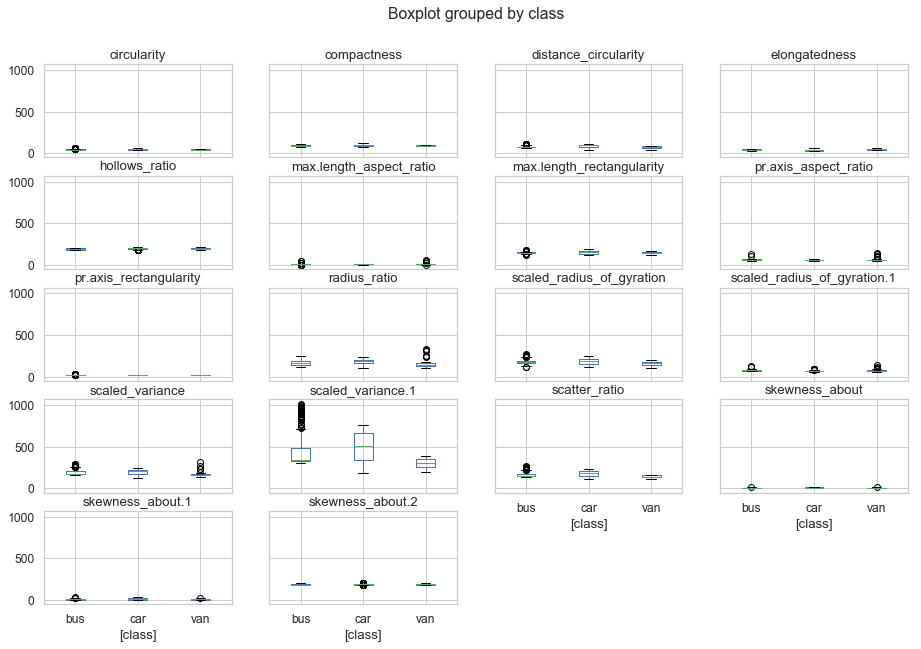

In [10]:
dfVehicle.boxplot(by = 'class',  layout=(5,4), figsize=(15, 10))

In [11]:
dfVehicle.shape

(846, 19)

In [12]:
#lets remove outliers using the IQR range
Q1 = dfVehicle.quantile(0.25)
Q3 = dfVehicle.quantile(0.75)
IQR = Q3 - Q1

In [13]:
# to remove outliers using IQR, will pass the above condition in the dataframe and will get another dataframe

dfVehicle_NoOutliers = dfVehicle[~((dfVehicle[dfNumericCol.columns] < (Q1 - 1.5 * IQR)) 
                                   |(dfVehicle[dfNumericCol.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
dfVehicle_NoOutliers.shape

(813, 19)

**Note -** there is a drop of 33 rows, which are removed as they were outliers in the dataset

Let's copy this new dataset back to original dataset

In [14]:
dfVehicle = dfVehicle_NoOutliers.copy()
dfVehicle.shape

(813, 19)

# Statistical Summary

In [15]:
dfVehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.612546,8.059733,73.0,87.0,93.0,100.0,116.0
circularity,813.0,44.798278,6.110731,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.154982,15.539338,40.0,70.0,80.0,98.0,112.0
radius_ratio,813.0,167.892989,31.553139,104.0,141.0,167.0,194.0,246.0
pr.axis_aspect_ratio,813.0,61.182042,5.626846,47.0,57.0,61.0,65.0,76.0
max.length_aspect_ratio,813.0,8.121771,2.048352,3.0,7.0,8.0,10.0,13.0
scatter_ratio,813.0,168.888069,32.781648,112.0,147.0,157.0,198.0,262.0
elongatedness,813.0,40.891759,7.725468,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.578106,2.553441,17.0,19.0,20.0,23.0,28.0
max.length_rectangularity,813.0,147.954490,14.484462,118.0,137.0,146.0,159.0,188.0


Removing outliers leads to new outliers as the variance decreases and the bell curve shrunks. Also since we dont have enough data it was better to just go 1.5 * IQR. 

Almost all data appears normally distributed as mean and median are approx equal/close to each other, except scatter_ratio, scaled_variance, scaled_variance.1 are the ones for whcih mean is higher and data is right skewed

We will mroe see this in the pair plot where the diagonals will show tha Gaussian distribution of the data

In [16]:
# Check for correlation of variable
dfVehicle.corr(method='pearson')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.679327,0.786824,0.745988,0.200634,0.497660,0.810842,-0.788560,0.811866,0.674166,0.791464,0.812494,0.577688,-0.253678,0.200640,0.161106,0.295414,0.364160
circularity,0.679327,1.000000,0.786778,0.640936,0.206156,0.564159,0.843765,-0.815764,0.840162,0.961220,0.802762,0.832483,0.925142,0.066697,0.140391,-0.014342,-0.116832,0.039182
distance_circularity,0.786824,0.786778,1.000000,0.808331,0.245454,0.668833,0.905577,-0.908687,0.894783,0.768689,0.884133,0.888193,0.702483,-0.237938,0.098813,0.263508,0.128912,0.321655
radius_ratio,0.745988,0.640936,0.808331,1.000000,0.666209,0.460691,0.789523,-0.844025,0.763829,0.576791,0.792802,0.776142,0.550545,-0.403176,0.040306,0.187190,0.418354,0.504693
pr.axis_aspect_ratio,0.200634,0.206156,0.245454,0.666209,1.000000,0.138261,0.199971,-0.301918,0.169752,0.145857,0.214810,0.186297,0.153509,-0.325102,-0.051539,-0.028583,0.406292,0.419801
max.length_aspect_ratio,0.497660,0.564159,0.668833,0.460691,0.138261,1.000000,0.497466,-0.502377,0.497233,0.647844,0.411562,0.457892,0.404288,-0.332752,0.084005,0.140972,0.056416,0.394449
scatter_ratio,0.810842,0.843765,0.905577,0.789523,0.199971,0.497466,1.000000,-0.972340,0.989441,0.807070,0.977548,0.992982,0.794915,0.002444,0.063471,0.214182,-0.003100,0.116181
elongatedness,-0.788560,-0.815764,-0.908687,-0.844025,-0.301918,-0.502377,-0.972340,1.000000,-0.949943,-0.770034,-0.964903,-0.955797,-0.762407,0.086977,-0.045458,-0.183955,-0.105264,-0.211086
pr.axis_rectangularity,0.811866,0.840162,0.894783,0.763829,0.169752,0.497233,0.989441,-0.949943,1.000000,0.810349,0.963794,0.987773,0.792197,0.017769,0.072726,0.216626,-0.026470,0.097951
max.length_rectangularity,0.674166,0.961220,0.768689,0.576791,0.145857,0.647844,0.807070,-0.770034,0.810349,1.000000,0.749677,0.794071,0.866940,0.052585,0.134630,-0.002441,-0.117667,0.067177


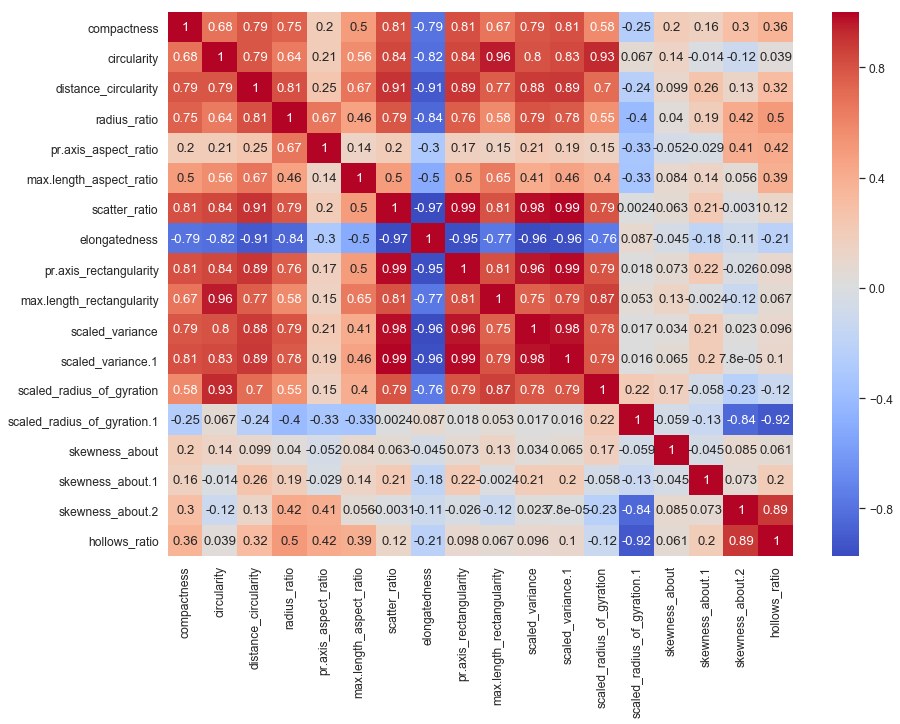

In [17]:
# drawing on numeric columns

plt.figure(figsize=(14, 10))

corr = dfVehicle.corr(method='pearson')
sns.heatmap(corr, cmap="coolwarm",
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

**Take a threshold of 0.95** and see features correleated with corr > 0.95

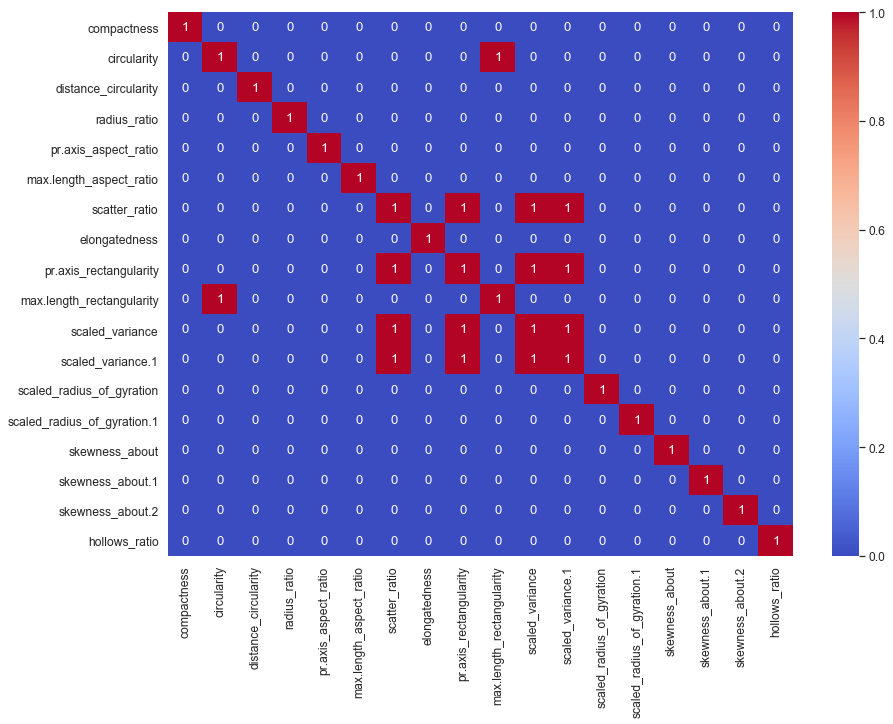

In [18]:
# drawing on numeric columns
threshold = 0.95
plt.figure(figsize=(14, 10))
sns.heatmap(corr > threshold, cmap="coolwarm",
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

Leaving diagonal (because a feature is always correlated to self), you can see many other features (=1) highly correlated to each others.

The ones with corr < 0.95 (marked = 0) are also correlated but below 0.95. 

# Remove Highly Correlated Features

In [19]:
# Create correlation matrix
corr_matrix = dfVehicle.corr(method='pearson').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

['elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1']

In [20]:
# Drop features which have correlation greater than 0.95
dfVehicle.drop(columns = to_drop, axis=1, inplace=True)
dfVehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,220.0,73.0,14.0,9.0,188.0,196.0,car
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,127.0,63.0,6.0,10.0,199.0,207.0,van
5,107.0,44.0,106.0,172.0,50.0,6.0,255.0,264.0,85.0,5.0,9.0,181.0,183.0,bus


In [21]:
dfVehicle.shape

(813, 14)

**Doing so we got rid of 5 highly correlated columns**

# Univariate and Multivariate Analysis

<Figure size 1008x1008 with 0 Axes>

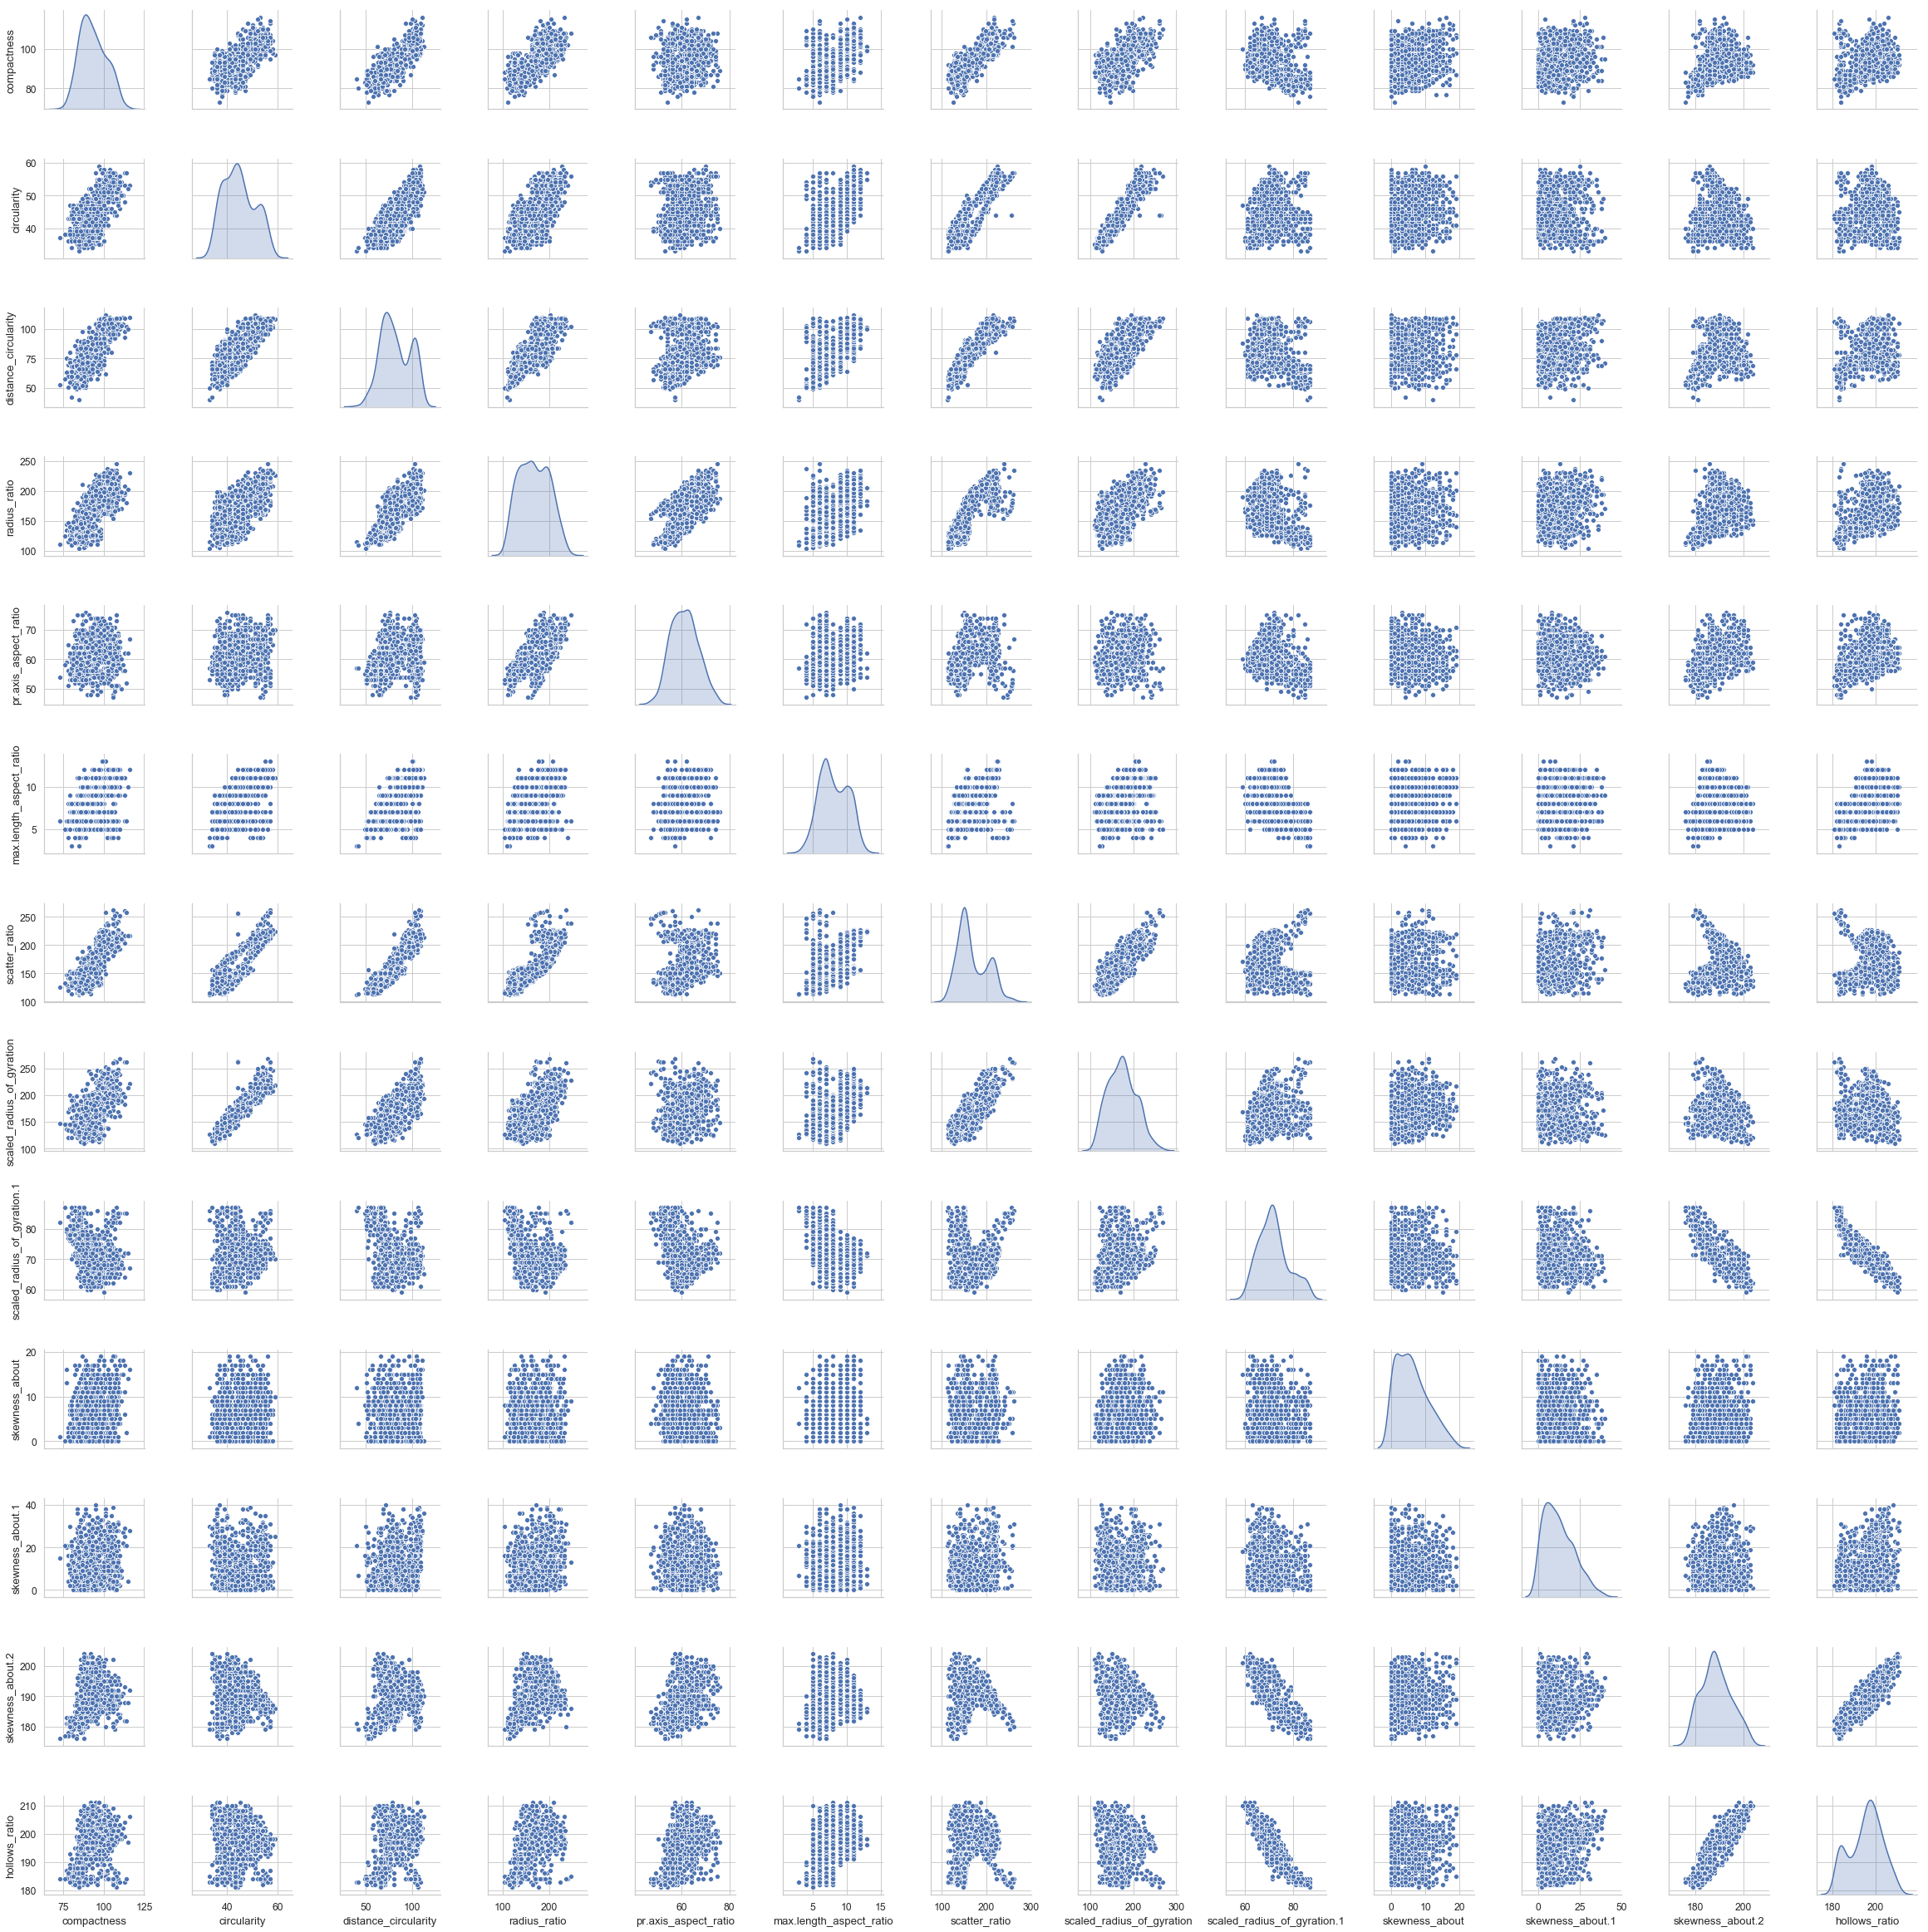

In [22]:
# pairplot on numeric fields
plt.figure(figsize=(14, 14))

sns.pairplot(dfVehicle, diag_kind='kde');

The diagonals are Gaussian distribution of individual features. But for many of the you can see there can be multiple Gaussians, meanin data from different samples merged in it

ALso we see some strong corelations among features as we see linear data increasing. Scatter_ratio, distaince_cirularity, circularity clearly show postivie linear correlation

There are many relations which appear to be cloud and linear relationships are hard to find in them for example scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, and hollow_ratio - they all show a cloud with no linear pattern with respect to others

**Analyzing Numerical Variables**

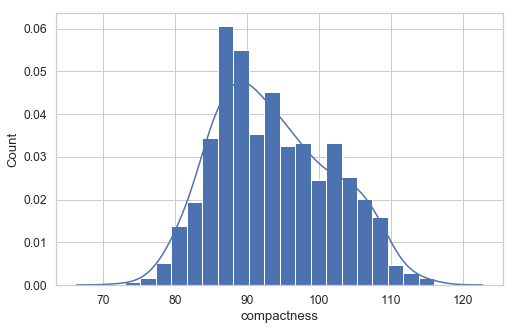

In [23]:
sns.distplot(
    dfVehicle['compactness'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='compactness', ylabel='Count');

Compactness has Gussian distribution with some early spikes. Closely seeing the graph it appears to has 2 Gaussian data merged

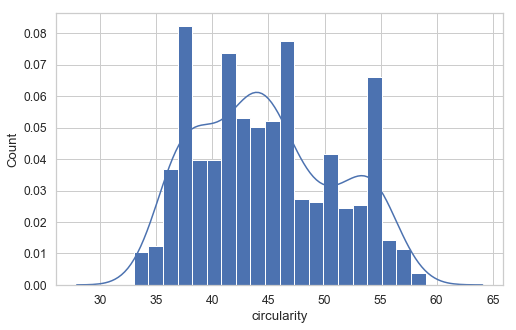

In [24]:
sns.distplot(
    dfVehicle['circularity'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='circularity', ylabel='Count');

Circularity has Gussian distribution from 3 different sources merged in this data set. Can see 3 peaks here

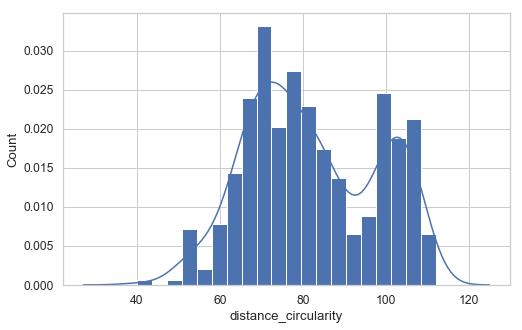

In [25]:
sns.distplot(
    dfVehicle['distance_circularity'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='distance_circularity', ylabel='Count');

Distance_circularity has Gussian distribution from 2 different sources merged in this data set. Can see 2 peaks here

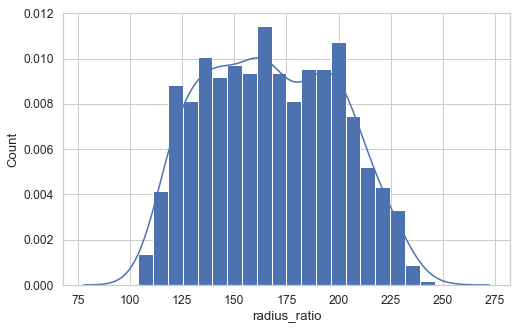

In [26]:
sns.distplot(
    dfVehicle['radius_ratio'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='radius_ratio', ylabel='Count');

Radius_ratio has Gussian distribution from 3 different sources merged in this data set. Can see 3 peaks here

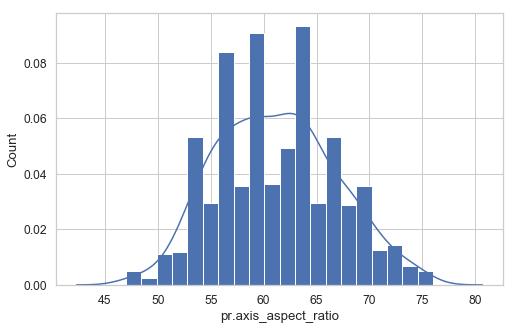

In [27]:
sns.distplot(
    dfVehicle['pr.axis_aspect_ratio'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='pr.axis_aspect_ratio', ylabel='Count');

PR.Axis_Aspect_ratio has Gussian distribution from 2 different sources merged in this data set. Can see 2 peaks here

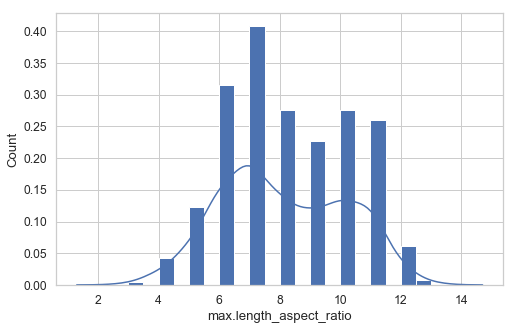

In [28]:
sns.distplot(
    dfVehicle['max.length_aspect_ratio'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='max.length_aspect_ratio', ylabel='Count');

Ma.Lentgh_Aspect_ratio has Gussian distribution from 2 different sources merged in this data set. Can clearly see 2 peaks

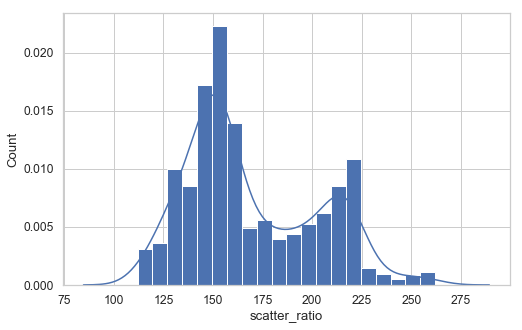

In [29]:
sns.distplot(
    dfVehicle['scatter_ratio'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='scatter_ratio', ylabel='Count');

Scatter_Ratio has Gussian distribution from 2 different sources merged in this data set. Can see 2 peaks here

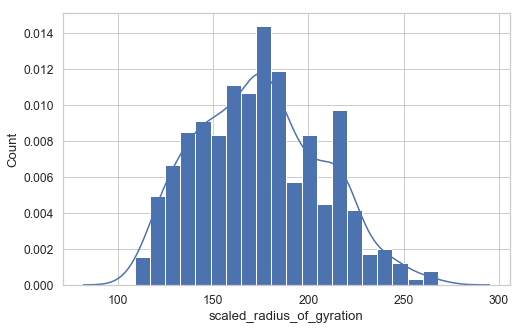

In [30]:
sns.distplot(
    dfVehicle['scaled_radius_of_gyration'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='scaled_radius_of_gyration', ylabel='Count');

Scaled_radius_of_Gyration has Gussian distribution from 3 different sources merged in this data set. Can see 3 peaks here
First 2 peaks are closely merged and then 3rd peak coming later down

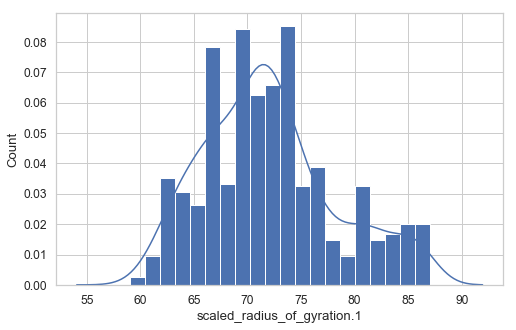

In [31]:
sns.distplot(
    dfVehicle['scaled_radius_of_gyration.1'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='scaled_radius_of_gyration.1', ylabel='Count');

Scaled_Radius_of_Gyration.1 has Gussian distribution from 4 different sources merged in this data set. Can see 4 peaks

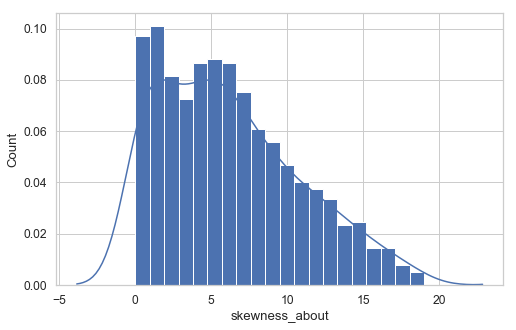

In [32]:
sns.distplot(
    dfVehicle['skewness_about'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='skewness_about', ylabel='Count');

Skewness_about data is containing data from multiple Gaussians. The first Gaussuan has high peaks followed by another Gaussian. Total 2 peaks can be seen in the above data distribution

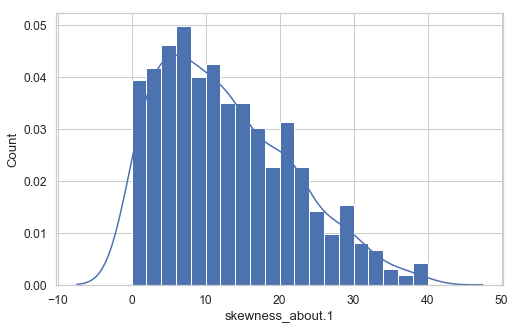

In [33]:
sns.distplot(
    dfVehicle['skewness_about.1'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='skewness_about.1', ylabel='Count');

Skewness_about.1 data is containing data from multiple Gaussians. The first Gaussuan has high peaks followed by another Gaussian. Then another Gaussian just behind the second Gaussian. Total 3 peaks can be seen in the above data distribution

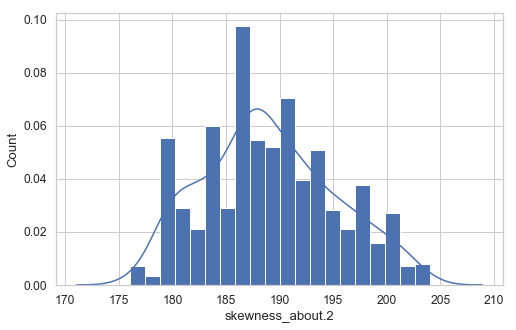

In [34]:
sns.distplot(
    dfVehicle['skewness_about.2'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='skewness_about.2', ylabel='Count');

Skewness_about.2 data is containing data from multiple Gaussians. The first Gaussuan has high peaks followed by another Gaussian. Total 2 peaks can be seen in the above data distribution

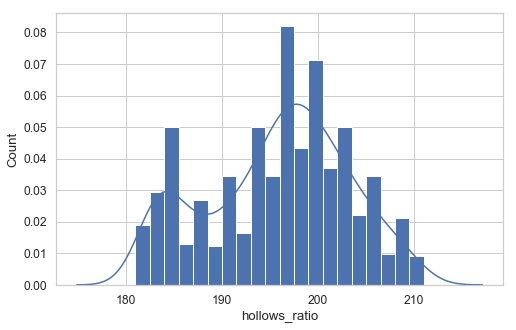

In [35]:
sns.distplot(
    dfVehicle['hollows_ratio'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='hollows_ratio', ylabel='Count');

hollows_ratio data is containing data from 2 Gaussians distributions

# Target Variable

In [36]:
print(list(dfVehicle['class'].unique()))
print(dfVehicle['class'].value_counts())

['van', 'car', 'bus']
car    416
bus    208
van    189
Name: class, dtype: int64


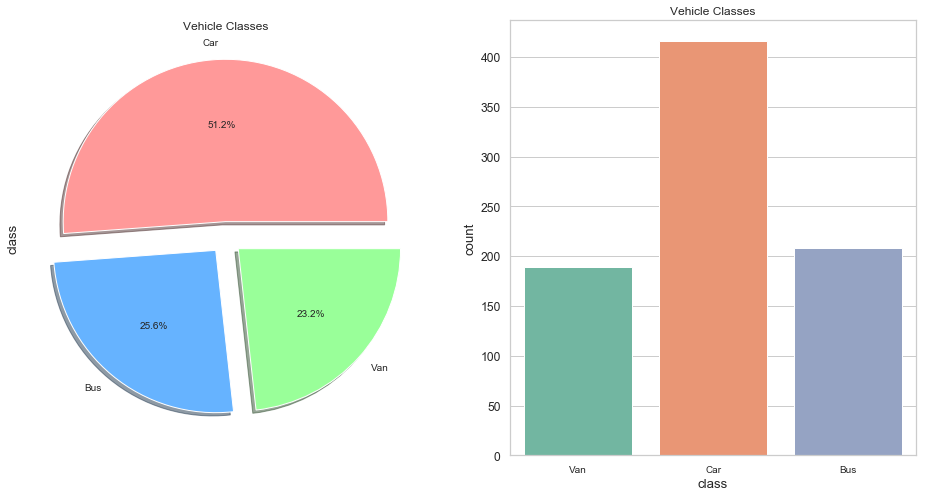

In [37]:
# Check Target variables 
fig, ax = plt.subplots(1, 2,figsize=(16,8))
labels = 'Car', 'Bus', 'Van'

dfVehicle['class'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, explode = (0.1, 0.1, 0.1), 
                                           labels=labels,fontsize=10, colors = ['#ff9999','#66b3ff','#99ff99'])
ax[0].set_title('Vehicle Classes', fontsize=12)

sns.countplot('class',data=dfVehicle,ax=ax[1], palette='Set2')
ax[1].set_title('Vehicle Classes', fontsize=12)
ax[1].set_xticklabels(['Van', 'Car', 'Bus'], fontsize=10)
plt.show()

DATASET CONTAINS CAR DATA MORE ALMOST 51% OF IT. BUS AND VAN APPROX CONTAIN 25% AND 23% EACH OF IT

# Convert the target column into numeric field

In [38]:
replace_map = {'class': {'car': 1, 'bus': 2, 'van': 3 }}
dfVehicle.replace(replace_map, inplace=True)
dfVehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,184.0,70.0,6.0,16.0,187.0,197.0,3
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,158.0,72.0,9.0,14.0,189.0,199.0,3
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,220.0,73.0,14.0,9.0,188.0,196.0,1
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,127.0,63.0,6.0,10.0,199.0,207.0,3
5,107.0,44.0,106.0,172.0,50.0,6.0,255.0,264.0,85.0,5.0,9.0,181.0,183.0,2


# PCA for dimensionality reduction

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfVehicle.iloc[:,0:-1], dfVehicle.iloc[:,-1], 
                                                    test_size=1/7.0, random_state=0, stratify=dfVehicle.iloc[:,-1])

In [40]:
# before doing the PCA it is mandatory to have the numerical columns scaled out using Standard Scaler here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [42]:
# will fit and transform the X_train_scaled data, and will only transform the X_test_scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
y_train_pca = y_train
y_test_pca = y_test

In [43]:
# number of components identified by PCA
pca.n_components_

7

In [44]:
# explained variance in each
pca.explained_variance_ratio_

array([0.43463797, 0.23389669, 0.08837277, 0.08391367, 0.06048509,
       0.04420472, 0.02179715])

In [45]:
pca.explained_variance_ratio_.sum()

0.9673080566634858

**As per the problem statement given we need to achieve the 95% of variance, which can be done using 7 components**

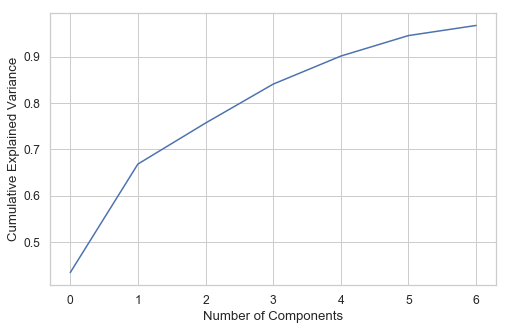

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

This curve quantifies how much of the total, 14-dimensional variance (we dropped 5 columns having >.95 correlation) is contained within the first N components. For example, we see that with the digits the first component contain approximately 68% of the variance, while you need around 4 components to describe close to 90% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 7 components to retain 96% of the variance. 

In [47]:
#The amount of variance that each PC explains
var_exp = np.round(pca.explained_variance_ratio_, decimals=4)*100

#Cumulative Variance explains
cum_var_exp=np.cumsum(var_exp)

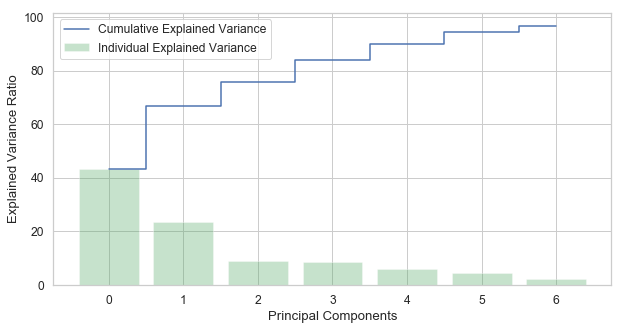

In [48]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Individual Explained Variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

Notice the code above has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

Make an instance of the Model pca = PCA(.95)

# Model fitting and Evaluation

In [49]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split

In [50]:
# this funtion helps to do a split for train and test data. It takes input as a dataframe 
def split_data(df):
    print(df.columns)
    #test train split time
    y = df['class'].values #target
    X = df.drop(['class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    return X_train, X_test, y_train, y_test

In [51]:
# model fitting
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('Train-set confusion matrix:\n', confusion_matrix(y_train,train_pred))
    return y_pred, y_pred_prob

In [52]:
def print_scores(y_test,y_pred):
    print("Accuracy score: \n", accuracy_score(y_test,y_pred))
    print('Test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("Classification report:" "\n", classification_report(y_test,y_pred))
    
    # since it is a multiclass dataset so we need to have to implment Label Binarizer
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred, average='macro')))

============================== SVM Linear Model Starts ==============================
Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio', 'class'],
      dtype='object')
Train-set confusion matrix:
 [[321   8   4]
 [  7 159   0]
 [  4   0 147]]
============================== SVM Linear Model Evaluation ==============================
Accuracy score: 
 0.9079754601226994
Test-set confusion matrix:
 [[76  4  3]
 [ 2 39  1]
 [ 4  1 33]]
Classification report:
               precision    recall  f1-score   support

           1       0.93      0.92      0.92        83
           2       0.89      0.93      0.91        42
           3       0.89      0.87      0.88        38

    accuracy                           0.91       163
   macro av

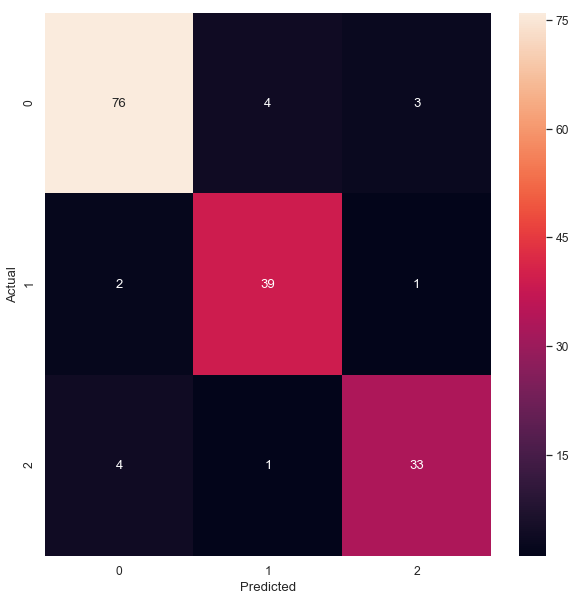


============================== SVM Linear Model Ends ==============================


============================== SVM RBF Model Starts ==============================
Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio', 'class'],
      dtype='object')
Train-set confusion matrix:
 [[333   0   0]
 [  0 166   0]
 [  0   0 151]]
============================== SVM RBF Model Evaluation ==============================
Accuracy score: 
 0.50920245398773
Test-set confusion matrix:
 [[83  0  0]
 [42  0  0]
 [38  0  0]]
Classification report:
               precision    recall  f1-score   support

           1       0.51      1.00      0.67        83
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.

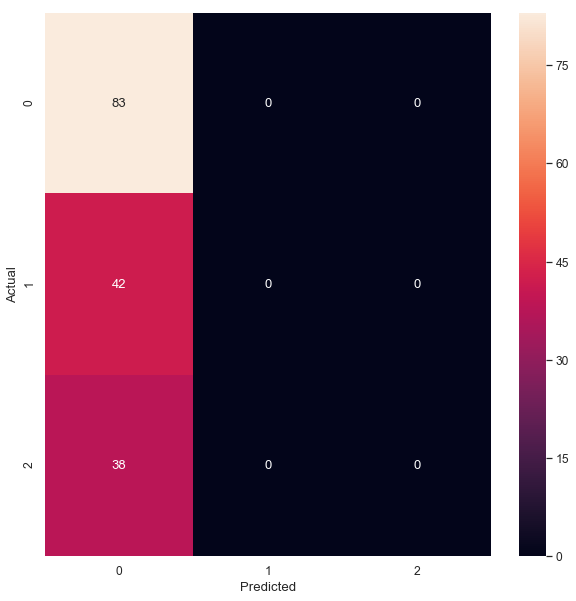


============================== SVM RBF Model Ends ==============================




In [53]:
modelsSVM = []

modelsSVM.append(('SVM Linear', svm.SVC(kernel='linear',probability=True)))
modelsSVM.append(('SVM RBF', svm.SVC(kernel='rbf',probability=True)))

for i,v in modelsSVM:
    print('============================== {} Model Starts =============================='.format(i))
    X_train, X_test, y_train, y_test = split_data(dfVehicle)
    y_pred, y_pred_prob = get_predictions(v, X_train, y_train, X_test)
    print('============================== {} Model Evaluation =============================='.format(i))
    print_scores(y_test,y_pred)

    print('\n============================== {} Model Heat Map Confusion Matrix =============================='.format(i))
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print('\n============================== {} Model Ends =============================='.format(i))
    print('\n')
    

# PCA applied data and Model Evaluation

============================== SVM Linear Model Starts With PCA ==============================
Train-set confusion matrix:
 [[295  32  29]
 [ 24 150   4]
 [ 31  11 120]]
============================== SVM Linear Model Evaluation ==============================
Accuracy score: 
 0.7692307692307693
Test-set confusion matrix:
 [[48  5  7]
 [ 5 24  1]
 [ 7  2 18]]
Classification report:
               precision    recall  f1-score   support

           1       0.80      0.80      0.80        60
           2       0.77      0.80      0.79        30
           3       0.69      0.67      0.68        27

    accuracy                           0.77       117
   macro avg       0.76      0.76      0.76       117
weighted avg       0.77      0.77      0.77       117

ROC AUC: 0.8144652819788937

============================== SVM Linear Model Heat Map Confusion Matrix ==============================


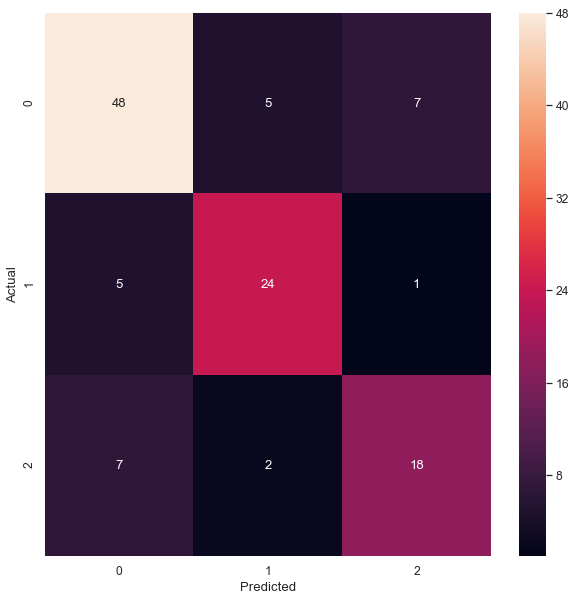

============================== SVM Linear Model Ends With PCA ==============================


============================== SVM RBF Model Starts With PCA ==============================
Train-set confusion matrix:
 [[347   4   5]
 [  2 176   0]
 [ 19   3 140]]
============================== SVM RBF Model Evaluation ==============================
Accuracy score: 
 0.8974358974358975
Test-set confusion matrix:
 [[54  1  5]
 [ 1 28  1]
 [ 3  1 23]]
Classification report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92        60
           2       0.93      0.93      0.93        30
           3       0.79      0.85      0.82        27

    accuracy                           0.90       117
   macro avg       0.89      0.90      0.89       117
weighted avg       0.90      0.90      0.90       117

ROC AUC: 0.9208924290291503

============================== SVM RBF Model Heat Map Confusion Matrix ==============================


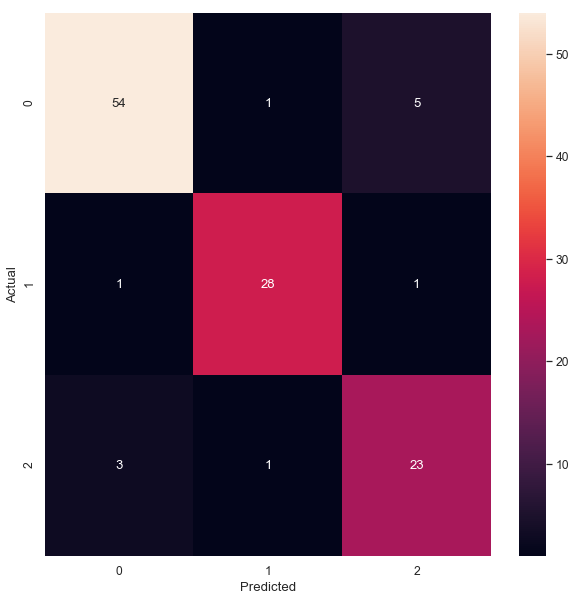

============================== SVM RBF Model Ends With PCA ==============================




In [54]:
modelsSVM = []

modelsSVM.append(('SVM Linear', svm.SVC(kernel='linear',probability=True)))
modelsSVM.append(('SVM RBF', svm.SVC(kernel='rbf',probability=True)))

for i,v in modelsSVM:
    print('============================== {} Model Starts With PCA =============================='.format(i))
    X_train, X_test, y_train, y_test = X_train_pca, X_test_pca, y_train_pca, y_test_pca
    y_pred, y_pred_prob = get_predictions(v, X_train, y_train, X_test)
    print('============================== {} Model Evaluation =============================='.format(i))
    print_scores(y_test,y_pred)

    print('\n============================== {} Model Heat Map Confusion Matrix =============================='.format(i))
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print('============================== {} Model Ends With PCA =============================='.format(i))
    print('\n')
    

# Grid Search  (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) 

In [55]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}
                   ]
clf = GridSearchCV(svm.SVC(), param_grid=tuned_parameters, cv=5)
clf.fit(X_train, y_train)
print("SVM :\n", clf.best_params_)

SVM :
 {'C': 1, 'kernel': 'rbf'}


**Use PCA applied X/y train test data**

============================ SVM RBF Model Starts With Grid Search And PCA ============================
Train-set confusion matrix:
 [[347   4   5]
 [  2 176   0]
 [ 19   3 140]]
============================== SVM RBF Model Evaluation ==============================
Accuracy score: 
 0.8974358974358975
Test-set confusion matrix:
 [[54  1  5]
 [ 1 28  1]
 [ 3  1 23]]
Classification report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92        60
           2       0.93      0.93      0.93        30
           3       0.79      0.85      0.82        27

    accuracy                           0.90       117
   macro avg       0.89      0.90      0.89       117
weighted avg       0.90      0.90      0.90       117

ROC AUC: 0.9208924290291503

============================== SVM RBF Model Heat Map Confusion Matrix ==============================


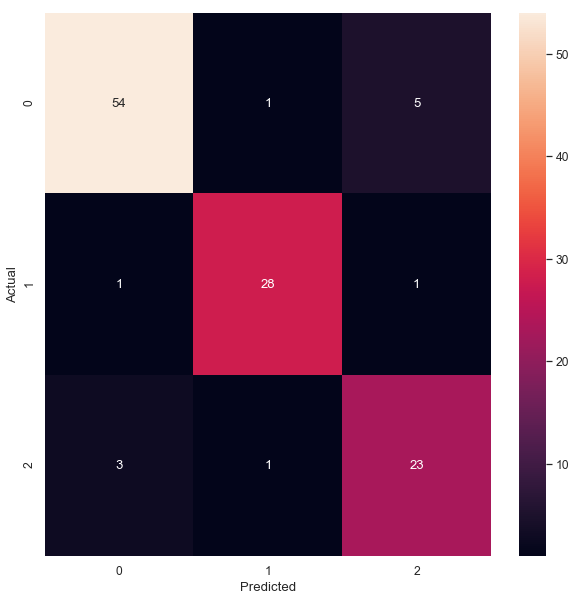

============================== SVM RBF Model Ends With Grid Search And PCA ==============================




In [56]:

drop_list = [] #to drop columns not affecting the model output
modelsSVM = []

modelsSVM.append(('SVM RBF', svm.SVC(C=1, kernel='rbf', probability=True)))

for i,v in modelsSVM:
    print('============================ {} Model Starts With Grid Search And PCA ============================'.format(i))
    X_train, X_test, y_train, y_test = X_train_pca, X_test_pca, y_train_pca, y_test_pca
    y_pred, y_pred_prob = get_predictions(v, X_train, y_train, X_test)
    print('============================== {} Model Evaluation =============================='.format(i))
    print_scores(y_test,y_pred)
    
#     print("Macro Average f1 score: {:.3f}".format(f1_score(y_test, y_pred, average="macro")))
    
    print('\n============================== {} Model Heat Map Confusion Matrix =============================='.format(i))
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print('============================== {} Model Ends With Grid Search And PCA =============================='.format(i))
    print('\n')
    

# Summary Report - 

**Most commonly used metric for imbalanced datasets in the multiclass setting is the multiclass version of the f-score. In this we have average calculation = marcro/micro and weighted. We will use MACRO as this gives equal weight to all classes no matter what their size is**

**When running the SVM model without PCA and Grid Search**

In this cas the SVM Linear model performs much better with recall for 3 classes ranges from 87% to 92% and ROC = 92%. 
**Macro Avg = 92%**

At same data, SVM RBF performed worst with ROC = 50% and recall for classes 2 and 3 = 0. 
**Macro Avg = 33%**

-------------------------------------------------------------------------------------------------------------------------

**When running the SVM model with PCA and without Grid Search**

In this case the SVM Linear model ROC = 81%. 
**Macro Avg = 76%**

For same data, SVM RBF performed better with ROC = 92%
**Macro Avg = 90%**

-------------------------------------------------------------------------------------------------------------------------

**When running the SVM model with PCA and with Grid Search**

**Hyperparameters -** SVM : {'C': 1, 'kernel': 'rbf'}

SVM RBF performed better with ROC = 92%
**Macro Avg = 90%**

-------------------------------------------------------------------------------------------------------------------------

# So we see that with PCA (with or without Grid Search) SVM-RBF kernel performed well on dataset with Macro Avg = 90%. 

# Hence we conclude that SVM RBF works well for this dataset